# Image distinguishment between Japanese and Chinese using Deep Learning

## Objective:
### This project will use a deep learning algorithm to create a Chinese vs Japanese image recognition system. The system will be trained on a dataset of images of Chinese and Japanese people, and will be able to identify which nationality a given image belongs to.
#### The Layers used were: Conv2D, MaxPooling2D, Dense, Flatten, Dropout


###### Authors: Omar Mohamed Abdelsalam, and Magdy Abdullah Eissa


# 1. Importing and Filtering Images

In [90]:
import cv2
import imghdr
import tensorflow as tf
import os

In [91]:
data_dir = 'data' 

In [92]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [93]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 2. Load Data

In [94]:
import numpy as np
from matplotlib import pyplot as plt

In [95]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 129 files belonging to 2 classes.


In [96]:
data_iterator = data.as_numpy_iterator()

In [97]:
batch = data_iterator.next()

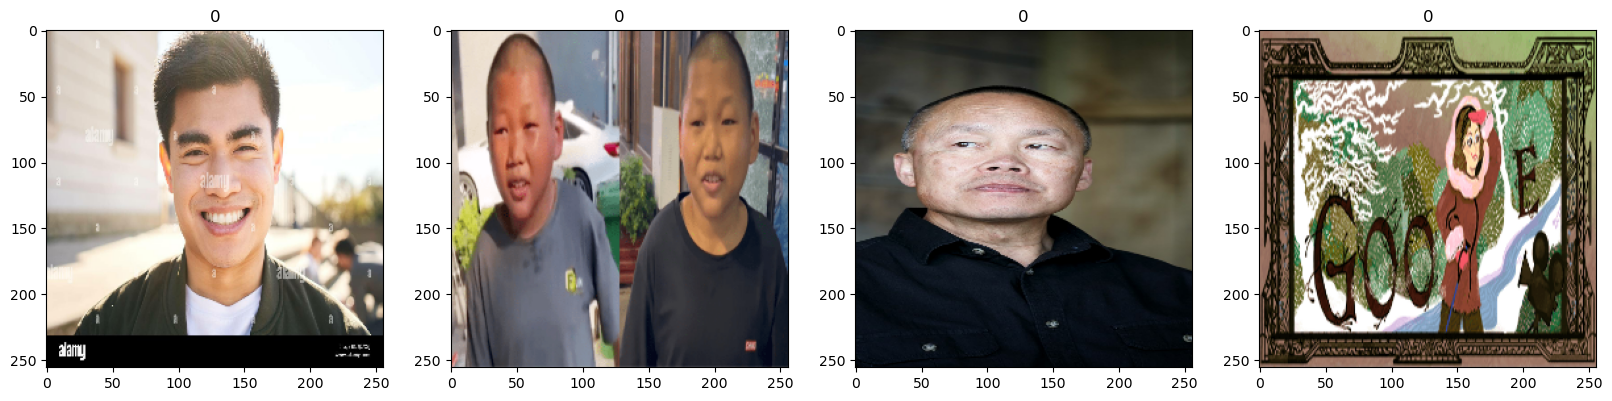

In [98]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


# 3. Scale Data

In [99]:
data = data.map(lambda x,y: (x/255, y))

In [100]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.28196603, 0.28196603, 0.23841253],
          [0.28786993, 0.28786993, 0.24685119],
          [0.28632993, 0.28632993, 0.24711424]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.28221136, 0.28221136, 0.23532847],
          [0.28106868, 0.28106868, 0.23772894],
          [0.2881794 , 0.2881794 , 0.25398824]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.2766719 , 0.2766719 , 0.24529934],
          [0.2867459 , 0.2867459 , 0.24876314],
          [0.28502735, 0.28502735, 0.247895  ]],
 
         ...,
 
         [[0.6097923 , 0.6227558 , 0.6628792 ],
          [0.61213

# 4. Split Data

In [101]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [102]:
train_size

3

In [103]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 5. Build Deep Learning Model

In [104]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout #CNN layers

In [106]:
model = Sequential()

In [107]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [108]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# 6. Train

In [110]:
logdir='logs'

In [111]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [112]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 5s 1s/step - loss: 0.9310 - accuracy: 0.4688 - val_loss: 0.7755 - val_accuracy: 0.5312
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 0.7492 - accuracy: 0.5417 - val_loss: 0.6716 - val_accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.6772 - accuracy: 0.5521 - val_loss: 0.6343 - val_accuracy: 0.7812
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 0.6454 - accuracy: 0.7292 - val_loss: 0.5936 - val_accuracy: 0.7188
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 0.6108 - accuracy: 0.7188 - val_loss: 0.6295 - val_accuracy: 0.5938
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 0.5825 - accuracy: 0.6771 - val_loss: 0.5396 - val_accuracy: 0.7500
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.5166 - accuracy: 0.8333 - val_loss: 0.4650 - val_accuracy: 0.7812
Epoch 8/20
3/3 [=========================

# 7. Plot Performance

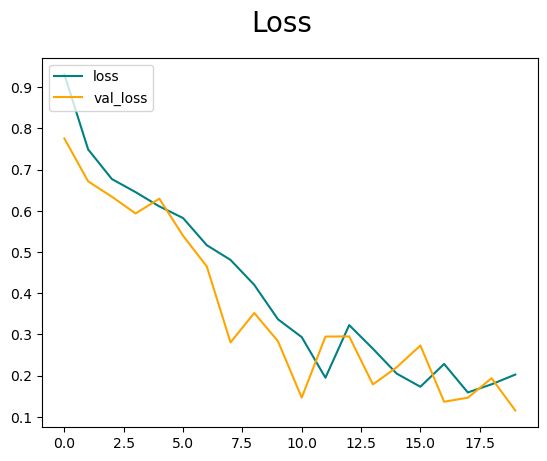

In [113]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

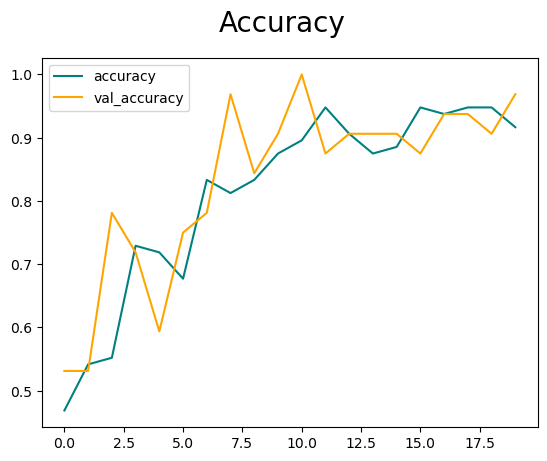

In [114]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 8. Evaluate

In [115]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [116]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [117]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [118]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 9. Test

In [119]:
import cv2

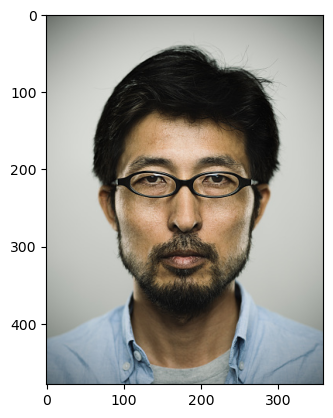

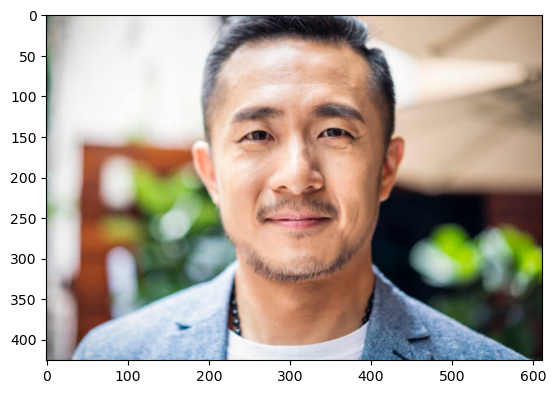

In [130]:
img = cv2.imread('japanesetest.jpg')

img = plt.imread("/Users/abdel/OneDrive/Desktop/Projects/11-23-2022/japanesetest.jpg")

plt.imshow(img)
plt.show()

img2 = cv2.imread('chinesetest2.0.jpg')

img2 = plt.imread("/Users/abdel/OneDrive/Desktop/Projects/11-23-2022/chinesetest2.0.jpg")

plt.imshow(img2)
plt.show()

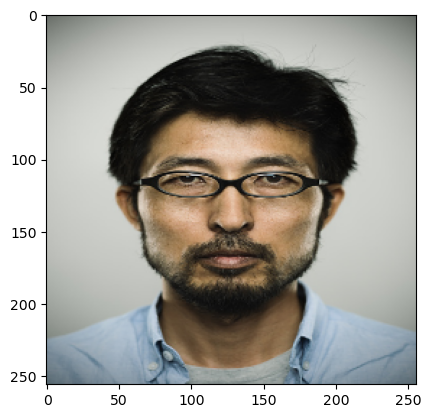

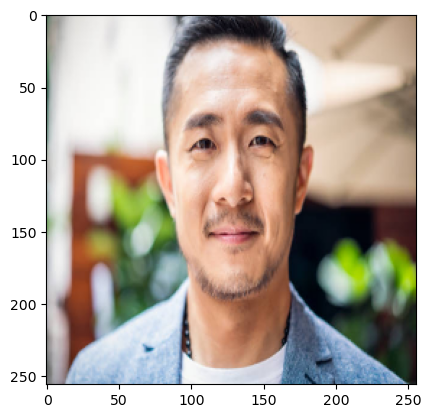

In [131]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [132]:
yhat = model.predict(np.expand_dims(resize/255, 0))

yhat2 = model.predict(np.expand_dims(resize2/255, 0))

1/1 [==============================] - 0s 46ms/step


In [133]:
yhat
yhat2

array([[0.03919338]], dtype=float32)

In [134]:
if yhat > 0.5: 
    print(f'Predicted class is Japanese')
else:
    print(f'Predicted class is Chinese')
    
if yhat2 > 0.5: 
    print(f'Predicted class is Japanese')
else:
    print(f'Predicted class is Chinese')

Predicted class is Japanese
Predicted class is Chinese


# 10. Save the Model

In [135]:
from tensorflow.keras.models import load_model

In [136]:
model.save(os.path.join('models','imageclassifier.h5'))

In [137]:
new_model = load_model('imageclassifier.h5')

In [138]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 123ms/step


array([[0.6558447]], dtype=float32)

# Finish


# Credit
Nicholas Renotte (https://www.youtube.com/watch?v=jztwpsIzEGc)
